## Observations and Insights

<ol>
    <li>It appears that many drugs reduced the tumor volume while some actually increased the tumor volume.</li>
    <li>There is a direct correlation between the weight of the mouse in grams and the avg tumor volume.</li>
    <li>There are no outliers in the data when looking at final tumor volumes.</li>
</ol>

## Dependencies and starter code

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [45]:
#preview mouse_data
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [46]:
#preview study_results
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [47]:
# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_gb = merged_df.groupby(['Drug Regimen'])
tumors = regimen_gb['Tumor Volume (mm3)']

tumor_mean = tumors.mean()
tumor_median = tumors.median()
tumor_var = tumors.var()
tumor_std = tumors.std()
tumor_sem = tumors.sem()

tumor_summary_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median, 'Variance': tumor_var, 
                                 'Std Deviation': tumor_std, 'SEM': tumor_sem})
tumor_summary_df

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Number of Treatments')

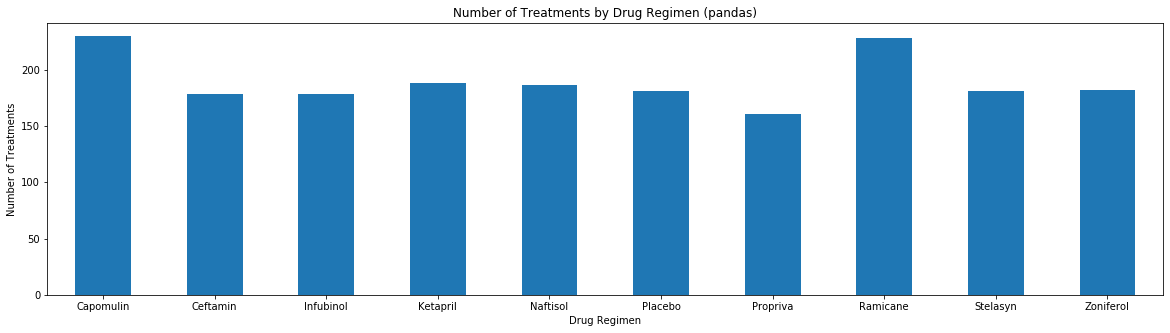

In [49]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
treatment_count = regimen_gb['Drug Regimen'].count()
treatment_count.plot.bar(figsize=(20, 5), rot=0)
plt.title('Number of Treatments by Drug Regimen (pandas)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Treatments')

Text(0, 0.5, 'Number of Treatments')

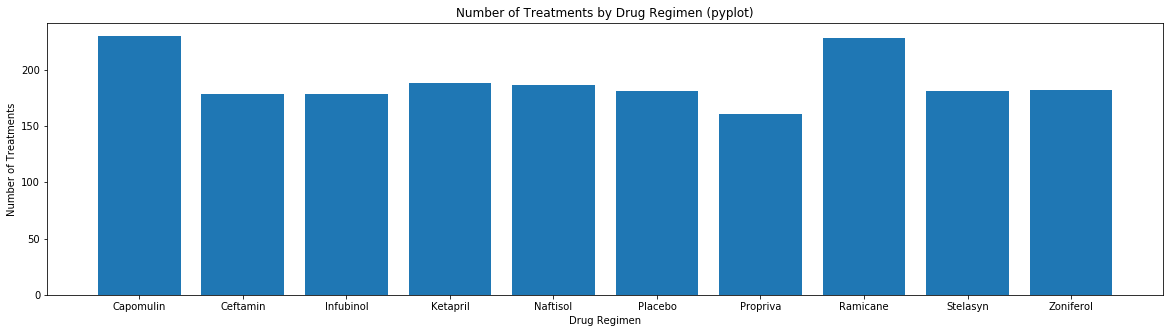

In [50]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = merged_df['Drug Regimen'].unique()
x_axis.sort()
plt.figure(figsize=(20,5))
plt.bar(x_axis, treatment_count)
plt.title('Number of Treatments by Drug Regimen (pyplot)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Treatments')

## Pie plots

Text(0, 0.5, '')

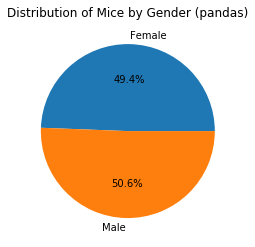

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_gb = merged_df.groupby(['Sex'])
genders = gender_gb['Mouse ID'].count()
labels = merged_df['Sex'].unique()
labels.sort()
genders.plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Mice by Gender (pandas)')
plt.ylabel('')

Text(0.5, 1.0, 'Distribution of Mice by Gender (pyplot)')

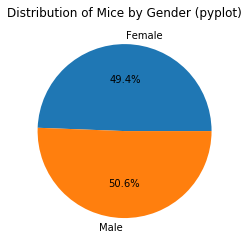

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(genders, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Mice by Gender (pyplot)')

## Quartiles, outliers and boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
preferred_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_measure_df = merged_df.loc[merged_df['Timepoint'] == 45]
tumor_df = final_measure_df.loc[final_measure_df['Drug Regimen'].isin(preferred_drugs)]
tumor_df = tumor_df.set_index('Mouse ID')
tumors = tumor_df['Tumor Volume (mm3)']
tumors = tumors.sort_values()
tumors

Mouse ID
k403    22.050126
s185    23.343598
m601    28.430964
x401    28.484033
g791    29.128472
          ...    
l471    67.748662
a203    67.973419
y769    68.594745
k210    68.923185
c139    72.226731
Name: Tumor Volume (mm3), Length: 63, dtype: float64

In [65]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 33.48002734
The upper quartile of temperatures is: 62.14221369
The interquartile range of temperatures is: 28.66218635
The the median of temperatures is: 40.1592203 
Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.


## There are no potential outliers in this data.

{'whiskers': [<matplotlib.lines.Line2D at 0x1b0dc71d648>,
 'caps': [<matplotlib.lines.Line2D at 0x1b0dc71dcc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b0dc6dff08>,
 'medians': [<matplotlib.lines.Line2D at 0x1b0dc724c48>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b0dc724d48>,
 'means': []}

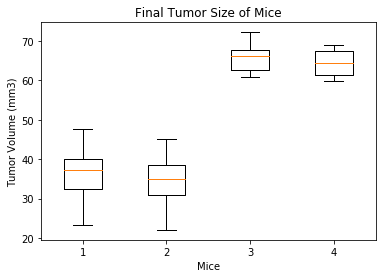

In [73]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumors_cap = tumor_df.loc[tumor_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
tumors_ram = tumor_df.loc[tumor_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
tumors_inf = tumor_df.loc[tumor_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
tumors_cef = tumor_df.loc[tumor_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

data = [tumors_cap, tumors_ram, tumors_inf, tumors_cef]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Size of Mice')
ax1.set_xlabel('Mice')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(data, showfliers=True)

## Line and scatter plots

Text(0, 0.5, 'Tumor Volume (mm3)')

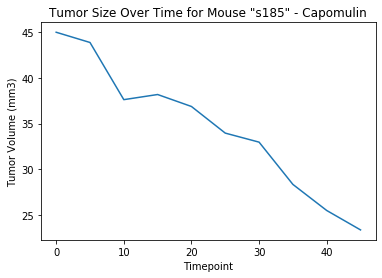

In [68]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_and_tumor_df = merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin']
s185_df = time_and_tumor_df.loc[time_and_tumor_df['Mouse ID'] == 's185']
s185_timepoints = s185_df['Timepoint']
s185_tumor_volumes = s185_df['Tumor Volume (mm3)']

plt.plot(s185_timepoints, s185_tumor_volumes)
plt.title('Tumor Size Over Time for Mouse "s185" - Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Avg Tumor Size')

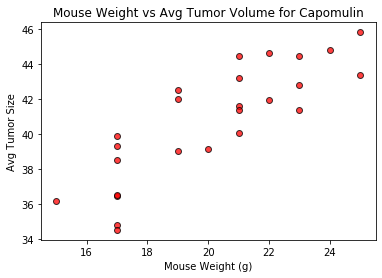

In [69]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_tumors_df = merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin']
avg_tumor_gb = avg_tumors_df.groupby('Mouse ID')
avg_tumors = avg_tumor_gb['Tumor Volume (mm3)'].mean()
mouse_weight = avg_tumor_gb['Weight (g)'].mean()

plt.scatter(mouse_weight, avg_tumors, marker='o', facecolors='red', edgecolors='black', alpha=0.75)
plt.title('Mouse Weight vs Avg Tumor Volume for Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg Tumor Size')

The correlation between both factors is 0.84
The r-squared is: 0.8419363424694718


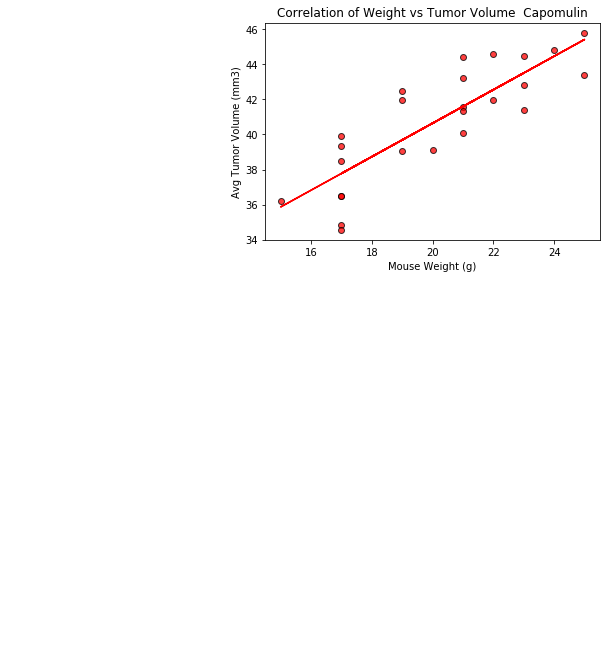

In [75]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight, avg_tumors)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumors)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_tumors, marker='o', facecolors='red', edgecolors='black', alpha=0.75)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Correlation of Weight vs Tumor Volume  Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue}")